In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px


In [ ]:
!pip install plotly_express

# Introduction 

I will be using 'Spotify's API' data, 'World Happiness' data, and 'Depression Rate by Country' data to address whether there's a relationship between a country's happiness or depression score and the types of songs that are popular. To do so, I will be assessing each country's top songs playlist and analyze the audio features to see how audio feature trends compare among countries with high or low happiness scores and low or high depression scores. 

I initially planned to look into people's preference on happier or sadder music across the globe and see whether music influences people's mental health, but this was not possible in the scope of my datasets. My question would not have been able to be answered through my data analysis. 

Therefore, I will be assessing audio feature trends of coutries' playlists with high happiness, low happiness, high depression, and low depression scores to see whether there is any relationship between type of music a country listens to and its happiness/depression scores. I am an avid listener of music and have always been intrigued by topics related to psychology so I was motivated to look into the Spotify API data along with the World Happiness and Depression data sets. 


* **[Spotify API data](https://developer.spotify.com/dashboard/login)**
This data provides information on music artists, tracks, audio features, and various song attributes from the Spotify Data Catalouge.  My motivation for looking at this data is to see what songs are most popular across the world by looking at "Top Songs" playlist for each country, and what the audio features of these popular songs are like. 

* **[World Happiness data](https://worldhappiness.report/ed/2022/#appendices-and-data)**
I got this data from the "World Happiness Report 2022", which shows how people evaluate their own lives in more than 150 countries worldwide. The report is made by using a global survey data, and the scores overall are explained by  **GDP per capita,social support, healthy life expectancy, freedom to make life choices, generosity, perceptions of corruption**. I was motivated to look into this data to see how each country scores in happiness levels.

* **[Depression Rate by Country data](https://worldpopulationreview.com/country-rankings/depression-rates-by-country)**
I found this data from the website linked above, but its original source is from the World Health Organization. This data provides the latest available estimates of the prevalence of depression for 2023 at the global and regional level. It includes information on **prevalence, number of cases, density, land area, region, subregion, growth rate, and population**. WHO has worked with lead Global Burden of Disease researchers for mental and behavioural disorders to provide this data. I was motivated to look into this data to see how prevalent depression is for each country, and how it differs with world happiness scores as well. 

Music can truly be considered a universal language, as people who do not necessarily speak or understand the language of the song still enjoy and appreciate music from all across the globe. I am eager to see common trends or differences in the types of music enjoyed by differing happiness and depression scored countries. 

***

# Methods 



## 1. Spotify API Data Pre-processing 

Since we are getting data from the web, Spotify's API, I went to https://developer.spotify.com/dashboard/login and got my credentials to access the data.

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotify_key
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=spotify_key.CLIENT_ID,
                                                           client_secret=spotify_key.CLIENT_SECRET))


#### Top Songs - Spotify Weekly Song Charts 
I am interested in what songs are the most popular in each country, so I focused on the weekly "Top Songs" playlist for each, which is curated by Spotify already. 

In [3]:
'''
playlists = sp.search(q = 'Spotify Weekly Top Song Chart', type = 'playlist', limit = 49)

# looking at playlist names and playlist urls
for idx, name in enumerate(playlists['playlists']['items']):
    print(idx, name['name'], ':', list(name['external_urls'].values()) )



playlist_df = pd.DataFrame.from_dict(playlists['playlists'])
playlist_df.to_csv('playlist_info')

'''

"\nplaylists = sp.search(q = 'Spotify Weekly Top Song Chart', type = 'playlist', limit = 49)\n\n# looking at playlist names and playlist urls\nfor idx, name in enumerate(playlists['playlists']['items']):\n    print(idx, name['name'], ':', list(name['external_urls'].values()) )\n\n\n\nplaylist_df = pd.DataFrame.from_dict(playlists['playlists'])\nplaylist_df.to_csv('playlist_info')\n\n"

In [47]:
'''
country = []
url = []


# getting playlist names and playlist urls
for i in playlists['playlists']['items']:
  country.append(i['name'])
  url.append(list(i['external_urls'].values()))

# combining list of lists into one
combined_url = [urls for list in url for urls in list]

# getting playlist uris
links = []
for u in combined_url:
  links.append(u.split("/")[-1].split("?")[0])

'''

'\ncountry = []\nurl = []\n\n\n# getting playlist names and playlist urls\nfor i in playlists[\'playlists\'][\'items\']:\n  country.append(i[\'name\'])\n  url.append(list(i[\'external_urls\'].values()))\n\n# combining list of lists into one\ncombined_url = [urls for list in url for urls in list]\n\n# getting playlist uris\nlinks = []\nfor u in combined_url:\n  links.append(u.split("/")[-1].split("?")[0])\n\n'

In [4]:
'''
rank = []
playlist_name = []
artist_name = []
track_name = []
popularity = []
track_id = []
artist_uri = []
artist_info = []
artist_pop = []
artist_genres = []

for l in links:
    for track in sp.playlist_tracks(l, limit = 10)['items']:
        
        # Playlist
        playlist_name.append(country[links.index(l)])
        
        # Rank
        rank.append(list(sp.playlist_tracks(l)['items']).index(track) + 1)
        
        # Track id
        track_id.append(track['track']['id'])
    
        #T rack name
        track_name.append(track['track']['name'])
    
        # Artist
        artist_uri = track['track']['artists'][0]['uri']
        artist_info = sp.artist(artist_uri)
    
        # Name, popularity, genre
        artist_name.append(track['track']['artists'][0]['name'])
        artist_pop.append(artist_info['popularity'])
        
        if len(artist_info['genres']) > 0:
          artist_genres.append(artist_info['genres'][0])
        else:
          artist_genres.append('None')

        # Popularity of the track
        popularity.append(track['track']['popularity'])


'''

"\nrank = []\nplaylist_name = []\nartist_name = []\ntrack_name = []\npopularity = []\ntrack_id = []\nartist_uri = []\nartist_info = []\nartist_pop = []\nartist_genres = []\n\nfor l in links:\n    for track in sp.playlist_tracks(l, limit = 10)['items']:\n        \n        # Playlist\n        playlist_name.append(country[links.index(l)])\n        \n        # Rank\n        rank.append(list(sp.playlist_tracks(l)['items']).index(track) + 1)\n        \n        # Track id\n        track_id.append(track['track']['id'])\n    \n        #T rack name\n        track_name.append(track['track']['name'])\n    \n        # Artist\n        artist_uri = track['track']['artists'][0]['uri']\n        artist_info = sp.artist(artist_uri)\n    \n        # Name, popularity, genre\n        artist_name.append(track['track']['artists'][0]['name'])\n        artist_pop.append(artist_info['popularity'])\n        \n        if len(artist_info['genres']) > 0:\n          artist_genres.append(artist_info['genres'][0])\n   

### Getting Audio Features

I plan to look at audio feature trends for each country's popular songs so I made imported data for audio features from Spotify API as well.

In [20]:
import pandas as pd

# getting audio features for each track id
audio = []
for id in track_id:
    if sp.audio_features(id):
        audio.append(sp.audio_features(id))
    else:
        audio.append('None')

In [23]:
# combining list of lists
combined_audio = [aud for list in audio for aud in list]

# creating dataframe
audio_df = pd.DataFrame(combined_audio)

# getting only columns I need
audio_df = audio_df[['acousticness','danceability','energy','instrumentalness','valence']]
audio_df.to_csv('audio_features.csv',index = False)

aud_df = pd.read_csv('audio_features.csv')

#### Audio Features

- **Acousticness** represents how acoustic a track is. High confidence a track is acoustic is indicated by 1.0.

- **Danceability** indicates how suitable a track is for dancing based on tempo, beat, strength, and other features. 1.0 is most danceable.

- **Energy** represents the perceived measure of intensity and activity, with high energy track feeling fast and loud.

- **Instrumentalness** indicates whether a track contains mostly instrumentals with no vocals. The higher the value is, the greater likelihood the track has no vocals.

- **Valence** describes the positiveness of a track. High valence tracks sound happy and low valence tracks sound sad.

I have gathered the important data needed, which includes **rank, playlist name, artist name, track name, track id, track popularity, artist popularity, artist genre, acousticness, danceability, energy, instrumentalness, and valence**. After gathering specific information, I put it together in a dataframe.

In [24]:
df = pd.DataFrame({'rank' : rank,
                   'playlist' : playlist_name,
                   'artist_name' : artist_name,
                   'track_name' : track_name,
                   'track popularity': popularity,
                   'artist genre': artist_genres,
                   'acousticness': list(aud_df['acousticness']),
                   'danceability': list(aud_df['danceability']),
                   'energy': list(aud_df['energy']),
                   'instrumentalness':  list(aud_df['instrumentalness']),
                   'valence': list(aud_df['valence']),
                   'track_id' : track_id})

I converted the dataframe to a csv file and imported it again.

In [14]:
# df.to_csv('top_songs_playlist.csv', index = False)

In [15]:
import pandas as pd
top10df = pd.read_csv('top_songs_playlist.csv')
top10df

,rank,playlist,artist_name,track_name,track popularity,artist genre,acousticness,danceability,energy,instrumentalness,valence,track_id
0,1,Top Songs - USA,Morgan Wallen,Last Night,83,contemporary country,0.4670,0.492,0.675,0.000000,0.478,7K3BhSpAxZBznislvUMVtn
1,2,Top Songs - USA,PinkPantheress,Boy's a liar Pt. 2,95,None,0.2520,0.696,0.809,0.000128,0.857,6AQbmUe0Qwf5PZnt4HmTXv
2,3,Top Songs - USA,SZA,Kill Bill,93,pop,0.0521,0.644,0.735,0.144000,0.418,1Qrg8KqiBpW07V7PNxwwwL
3,4,Top Songs - USA,Miley Cyrus,Flowers,82,pop,0.0632,0.707,0.681,0.000005,0.646,4DHcnVTT87F0zZhRPYmZ3B
4,5,Top Songs - USA,The Weeknd,Die For You (with Ariana Grande) - Remix,67,canadian contemporary r&b,0.2270,0.575,0.500,0.000000,0.506,4W4fNrZYkobj539TOWsLO2
...,...,...,...,...,...,...,...,...,...,...,...,...
485,6,Top Songs - New Zealand,Harry Styles,As It Was,90,pop,0.3420,0.520,0.731,0.001010,0.662,4Dvkj6JhhA12EX05fT7y2e
486,7,Top Songs - New Zealand,Coi Leray,Players,90,new jersey underground rap,0.0300,0.954,0.516,0.000008,0.624,6UN73IYd0hZxLi8wFPMQij
487,8,Top Songs - New Zealand,Miguel,Sure Thing,91,dance pop,0.0267,0.684,0.607,0.000307,0.498,0JXXNGljqupsJaZsgSbMZV
488,9,Top Songs - New Zealand,Libianca,People,88,None,0.5510,0.573,0.422,0.000013,0.693,26b3oVLrRUaaybJulow9kz


***

## 2. World Happiness Data & World Depression Data

After importing the datasets, I noticed that there were countries that were not included in the Spotify dataset. I threfore pre-processed the data to include only the countries that are in all three datasets.

In [16]:
# importing world happiness data
happiness_df = pd.read_csv('world-happiness-data.csv', header = 0, sep = ',')

# importing world happiness data
depression_df = pd.read_csv('depression-data-2023.csv')

# checking countries 
wh_countries = list(happiness_df['Country'])
wd_countries = list(depression_df['country'])
    
# getting all playlist names
countries = list(top10df['playlist'].unique())

To only get the country's name in the playlist names, I created a for loop that would remove the "Top Songs -". 

While reviewing the countries that are in the dataset, I immediately saw that Spotify indicated United States as "USA" while the other two datasets indicated it as "United States" so I changed it in the list of retrieved country names that I made from the Spotify data.

In [17]:
# using for loop to only get country in playlist name
for i in range(len(countries)):
    countries[i] = countries[i][12:]

# changing USA to United States 
countries[0] = 'United States'

# getting common countries in data sets
common_country = []
for c in countries:
    if c in wh_countries and c in wd_countries:
        common_country.append(c)

In [18]:
# checking what countries in Spotify are not in common_country
not_common = []
for i in countries:
    if i not in common_country:
        not_common.append(i)
not_common

['Global', 'Taiwan', 'Hong Kong', 'Ecuador', 'Czech Republic']

After checking the unique values, I saw the Taiwan and Hong Kong were not in the depression dataset but Czech Republic was in the happiness dataset by the name of 'Czechia' so I appended 'Czech Republic' and 'Czechia' to the **common_country** list

In [19]:
# checking
happiness_df['Country'].unique()
depression_df['country'].unique()

common_country.append('Czech Republic')
common_country.append('Czechia')

Now I got the rows and features of interest and saved it as a new csv and imported it for both datasets.

In [20]:
# getting rows for only common countries in Spotify data
whdf = happiness_df[happiness_df['Country'].isin(common_country)]
wddf = depression_df[depression_df['country'].isin(common_country)]

# getting features of interest
whdf = whdf[['RANK', 'Country', 'Happiness score']]
wddf = wddf[['country','region','prevalence', 'cases', 'pop2023']]

# saving data
whdf.to_csv('world-happiness-cleaned.csv', index=False)
wddf.to_csv('world-depression-cleaned.csv', index=False)

# importing data
wh_data = pd.read_csv('world-happiness-cleaned.csv')
wd_data = pd.read_csv('world-depression-cleaned.csv')

I did a final check to see if all the countries in both data sets were common and had the same number of rows

In [21]:
# checking size
print(wh_data.shape)
print(wd_data.shape)

# checking countries are all same
wh_data['Country'].unique() in wd_data['country'].unique()

(45, 3)
(45, 5)


True

### Merging Datasets

To have the happiness and depression scores in the Top Songs Playlist dataset, I extracted the happiness and depression values for each country that matched the country's playlist in Spotify data and added to the **top10_df** data frame. I also removed all the playlists that did not have happiness or depression scores.

In [22]:
new_col = []

for playlist in top10df['playlist']:
    playlist = playlist[12:]
    if playlist == 'USA':
        row = wh_data.loc[wh_data['Country'] == 'United States']
        hap_score = list(row['Happiness score'])
        new_col.append(hap_score)
    elif playlist == 'Czech Republic':
        row = wh_data.loc[wh_data['Country'] == 'Czechia']
        hap_score = list(row['Happiness score'])
        new_col.append(hap_score)
    elif playlist in common_country:
        row = wh_data.loc[wh_data['Country'] == playlist]
        hap_score = list(row['Happiness score'])
        new_col.append(hap_score)
    else:
        new_col.append([0])
happiness_col = sum(new_col,[])

# adding happiness score to top 10 playlists data frame
top10df['Happiness Score'] = happiness_col
top10df = top10df[top10df['Happiness Score'] != 0]

In [23]:
dep_col = []

for playlist in top10df['playlist']:
    playlist = playlist[12:]
    if playlist == 'USA':
        row = wd_data.loc[wd_data['country'] == 'United States']
        dep_score = list(row['prevalence'])
        dep_col.append(dep_score)
    elif playlist in common_country:
        row = wd_data.loc[wd_data['country'] == playlist]
        dep_score = list(row['prevalence'])
        dep_col.append(dep_score)
    else:
        dep_col.append([0])

depression_col = sum(dep_col,[])

# adding happiness score to top 10 playlists data frame
top10df['Depression Prevalence'] = depression_col
top10df = top10df[top10df['Depression Prevalence'] != 0].copy()

/tmp/ipykernel_696/3746929461.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10df['Depression Prevalence'] = depression_col


In [25]:
top10df.to_csv('top_songs_whwd_combined.csv', index = False)
top10_df = pd.read_csv('top_songs_whwd_combined.csv')

*** 
## Exploring the Data through Data Visualizations

### 1. Spotify Data - Top Songs Playlist Data

I found that some artist genre were missing so I appended 'None' to each and saw which country's playlist had 'None'.

In [14]:
top10_df.loc[(top10_df['artist genre'] == 'None')]

,rank,playlist,artist_name,track_name,track popularity,artist genre,acousticness,danceability,energy,instrumentalness,valence,track_id,Happiness Score,Depression Prevalence
1,2,Top Songs - USA,PinkPantheress,Boy's a liar Pt. 2,95,None,0.252000,0.696,0.809,0.000128,0.857,6AQbmUe0Qwf5PZnt4HmTXv,6.977,5.9
39,10,Top Songs - Japan,natori,Overdose,77,None,0.030700,0.733,0.598,0.000017,0.831,2Dzzhb1oV5ckgOjWZLraIB,6.039,4.2
49,10,Top Songs - South Korea,LE SSERAFIM,ANTIFRAGILE,85,None,0.082100,0.882,0.797,0.000000,0.824,4fsQ0K37TOXa3hEQfjEic1,5.935,4.1
64,5,Top Songs - Brazil,Treyce,Lovezinho,83,None,0.295000,0.824,0.587,0.000003,0.605,5smr3wYPodiv8ogWy0DE6J,6.293,5.8
86,7,Top Songs - Philippines,Adie,Mahika,77,None,0.742000,0.635,0.451,0.000000,0.601,47sq83n5WN22ZzYnGn8aTy,5.904,3.3
102,3,Top Songs - Germany,AYLIVA,Sie weiß (feat. Mero),80,None,0.517000,0.792,0.679,0.000015,0.204,7DyDjhZMEIK5Ied4juTCyc,7.034,5.2
120,1,Top Songs - Argentina,Big One,En La Intimidad | CROSSOVER #1,83,None,0.092400,0.804,0.555,0.000000,0.640,7w7BrPbOjF5OxChs2dxFve,5.967,4.7
127,8,Top Songs - Argentina,Taiu,Rara Vez,85,None,0.176000,0.838,0.708,0.000000,0.960,7MVIfkyzuUmQ716j8U7yGR,5.967,4.7
153,4,Top Songs - Italy,Matteo Paolillo - Icaro,ORIGAMI ALL'ALBA - CLARA,76,None,0.577000,0.633,0.751,0.000000,0.430,3X6QTmtaKukOu5lISJYi4g,6.467,5.1
154,5,Top Songs - Italy,Tananai,TANGO,71,None,0.232000,0.330,0.668,0.000000,0.323,74cyFjvgjyiFiQ3QxszFWq,6.467,5.1


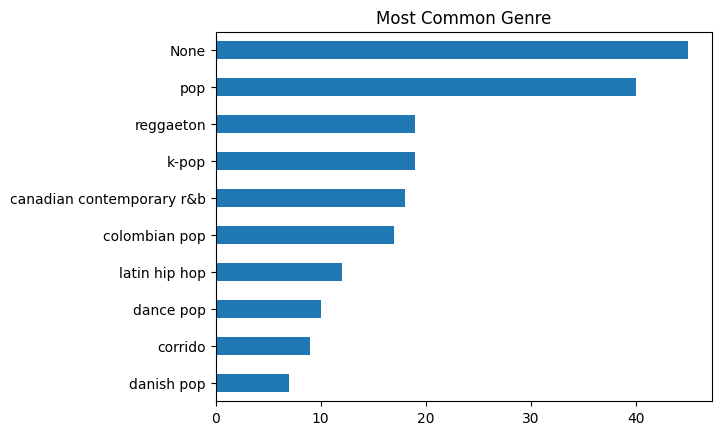

In [27]:
# exploring what genres were most common overall
top10_df['artist genre'].value_counts().sort_values()[-10:].plot.barh()
plt.title('Most Common Genre')
plt.show()

> "None" had the most count for artist genre, with "pop" coming close to highest and then "reggaeton", "k-pop", "canadian contemporary r&b", and "colombian pop". I also explored what country had the most amount of "None" values for artist genre. 

South Africa had the most amount of 'none' values for artist genre, with Poland coming second, and Ukraine, Turkey, and Thailand and many others having either 1 or 2 'None' artist genres.

In [60]:
top10_df.loc[top10_df['artist genre'] == 'None', 'playlist'].value_counts()

Top Songs - South Africa      5
Top Songs - Poland            3
Top Songs - Ukraine           2
Top Songs - Turkey            2
Top Songs - Thailand          2
Top Songs - Indonesia         2
Top Songs - Netherlands       2
Top Songs - New Zealand       2
Top Songs - Italy             2
Top Songs - Argentina         2
Top Songs - Saudi Arabia      2
Top Songs - Singapore         1
Top Songs - Belgium           1
Top Songs - Norway            1
Top Songs - Malaysia          1
Top Songs - Romania           1
Top Songs - Austria           1
Top Songs - Sweden            1
Top Songs - USA               1
Top Songs - Canada            1
Top Songs - Peru              1
Top Songs - Japan             1
Top Songs - Australia         1
Top Songs - United Kingdom    1
Top Songs - Israel            1
Top Songs - Germany           1
Top Songs - Philippines       1
Top Songs - Brazil            1
Top Songs - South Korea       1
Top Songs - Ireland           1
Name: playlist, dtype: int64

#### Audio Features
Since I will be exploring the relationship between country's happiness/depression score and audio feature trends, I wanted to see what the overall mean was for each audio feature. 

> The data shows that **'danceability', 'energy', and 'valence'** has the highest mean values and **'instrumentalness** has the lowest. 

This suggests that most countries prefer songs with vocals rather than pure instrumentals and songs that are high in energy and danceable.

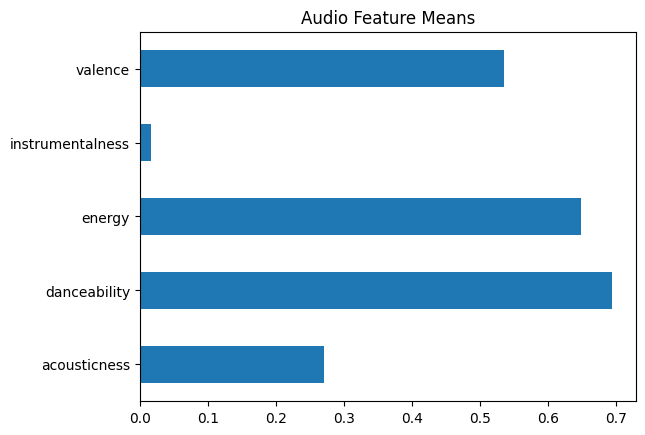

In [61]:
# mean audio features overall 
top10_df[['acousticness','danceability','energy','instrumentalness','valence']].mean().plot.barh()

plt.title('Audio Feature Means')
plt.show()

##### Valence
Valence describes the positiveness of a track, in which high valence tracks sound happy and low valence tracks sound sad, so I made a scatter plot to see if there was an overall correlation between track popularity and valence scores. There seems to be no correlation between the two.

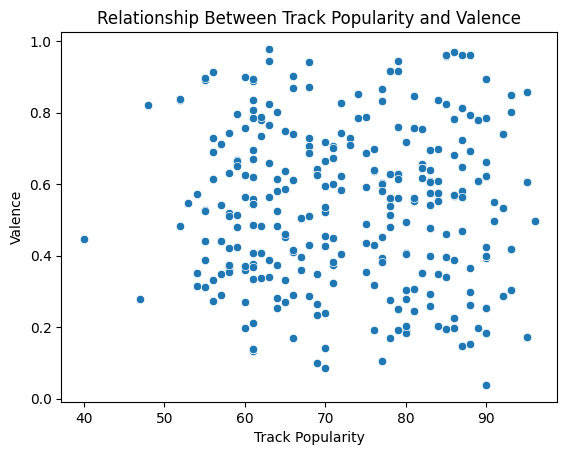

In [62]:
sns.scatterplot(x = 'track popularity', y='valence', data = top10_df)
plt.xlabel('Track Popularity')
plt.ylabel('Valence')
plt.title('Relationship Between Track Popularity and Valence')
plt.show()

#### Playlist with high mean valence score
As I will be looking at happiness and depression scores too, I made a horizontal bar chart to visualize which playlist had the highest mean valence score. It will be interesting to analyze after viewing the happiness and depression data whether the countries' playlists with high mean valence scores reflect any relationship between the two.
* **Argentina, Spain, Mexico, South Korea, and Guatemala** are the countries with highest mean valence scores for their playlist. As these countries are known for their popular genres, raggaeton or k-pop, this suggests that there also may be some correlation bewteen other audio features such as valence and the danceability of the songs. I will keep these countries' playlists in mind when looking at the happiness score dataset - will these countries be in the top highest happiness scores?

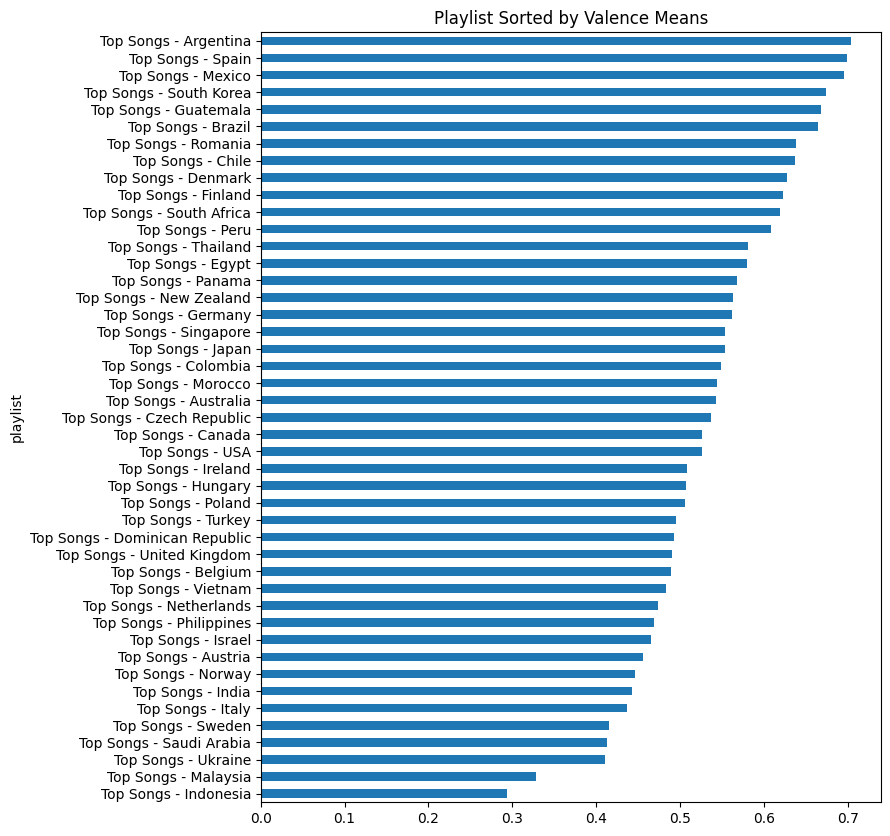

In [64]:
top10_df.groupby('playlist')['valence'].mean().sort_values().plot.barh(figsize = (8,10))
plt.title('Playlist Sorted by Valence Means')
plt.show()

### 2. World Happiness Dataset

To visualize which countries had the highest happiness score, I sorted the countries by happiness scores and plotted it in a bar chart from highest to lowest happiness score.


In [17]:
happiness_df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

**Finland** had the highest happiness score, with **Denmark** coming very close. I saw that the top 5 countries with highest happiness score were all from Northern or Western Europe regions. 

**India** had the lowest happiness score, with **Egypt** having the second lowest. Three out of the five lowest happiness scores were from regions in Asia.

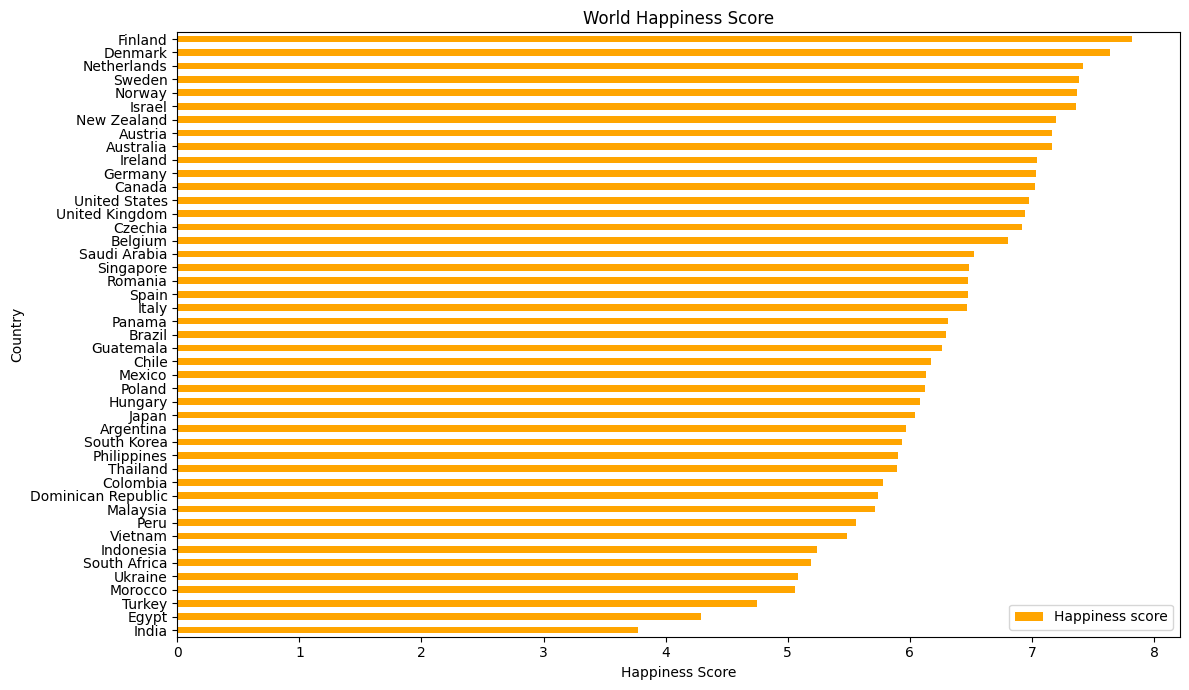

In [67]:
scores = wh_data.sort_values(by = 'Happiness score')
scores.plot(x = 'Country', y = 'Happiness score', kind = 'barh', figsize = (12, 7), color = 'orange')

plt.title('World Happiness Score')
plt.xlabel('Happiness Score')
plt.tight_layout()


### 3. World Depression Data

To also visualize the depression scores, I sorted the countries from highest to lowest prevalence of depression. As seen in the Happiness data, Ukraine was one of the lowest 5 happiness score countries and I was able to see again from the data visualization below that **Ukraine** had the highest depression prevalence. An interesting point to note was that **Finland**, which had the highest happiness score, was one of the 5 countries with highest depression prevalence as well. 
> It is important to question who was included in the data and how it was collected. 

Although **Egypt** was second lowest scoring for the Happiness data, it is also second lowest in prevalence of depression. I would assume that prevalence of depression would be higher in Egypt than in Finland, but this is not the case shown by this data set. The data suggests that there may have been some external factors such as negative stigma around mental health or different cultural backgrounds that led to lower prevalence of depression.

**Who** is able to be represented in the data is also crticial, as some countries in this data may not have proper health systems or access to mental health care, leading to lower reports of depression.

Cultural factors may play a role in the reported prevalence of depression. In the lowest five countries: Philippines, Egypt, Indonesia, Guatemala, and Malaysia, it may be more taboo in their cultures to openly talk about depression or other mental health concerns. However in the top countries: Ukraine, United States, Australia, Brazil, and Finland, mental health may be openly talked about and have resources provided for mental health concerns.

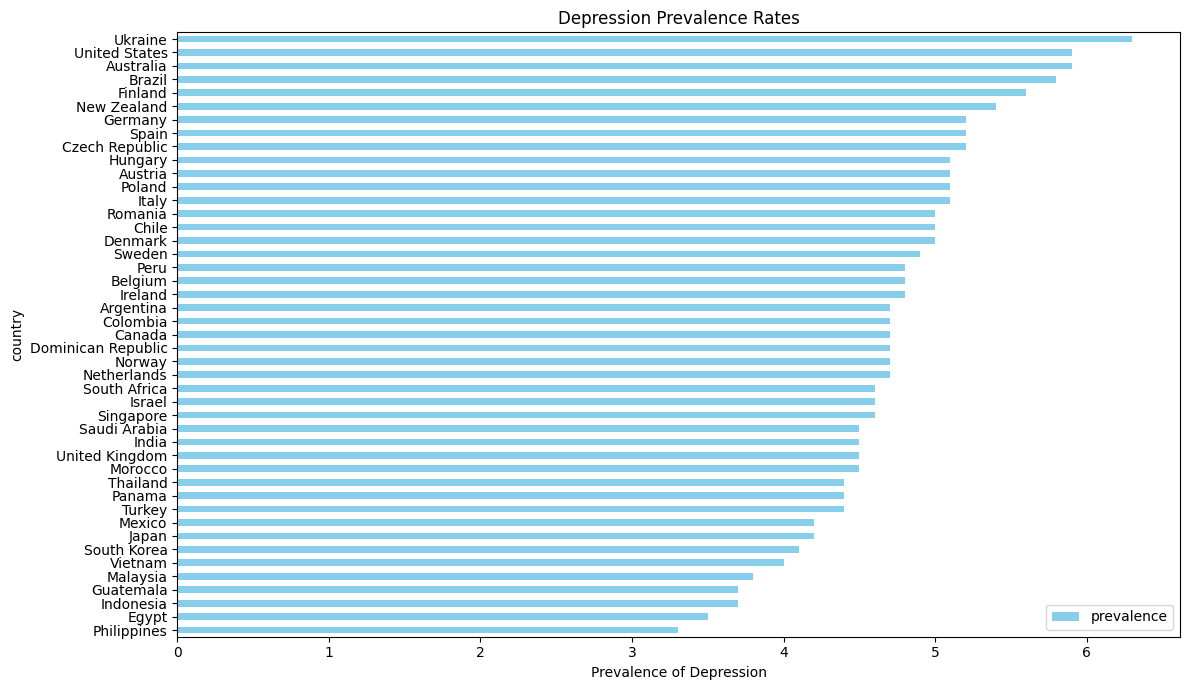

In [66]:
prev = wd_data.sort_values(by = 'prevalence')
prev.plot(x = 'country', y = 'prevalence', kind = 'barh', figsize = (12, 7), color = 'skyblue')

plt.title('Depression Prevalence Rates')
plt.xlabel('Prevalence of Depression')
plt.tight_layout()


####  Happiness Scores and Depression Prevalence

I wanted to visualize both dataset in one data visualization so I combined the World Happiness data and World Depression data by making a new dataframe with just **Country, Happiness Score, and Depression Prevalence**. I got the country name using a for loop and added depression prevalence for each country.

In [68]:
combined = wh_data[['Country', 'Happiness score']].copy()


depcol = []

for country in combined['Country']:
    if country == 'Czechia':   
        row = wd_data.loc[wd_data['country'] == 'Czech Republic']
        dprev = list(row['prevalence'])
        depcol.append(dprev)
    elif country in common_country:
        row = wd_data.loc[wd_data['country'] == country]
        dprev = list(row['prevalence'])
        depcol.append(dprev)
    else:
        depcol.append([0])

dcol = sum(depcol,[])

# adding depression column to happiness data 
combined['Depression prevalence'] = dcol
combined = combined[combined['Depression prevalence'] != 0]

The countries are sorted by happiness scores, from highest to lowest. 

> By ordering the countries in this way, the graph interestingly shows how countries with **lower happiness scores** have **lower depression prevalence** as well. 
> Meanwhile, countries with **high happiness scores** have **higher prevalence of depression** than those with lower happiness scores.

In [70]:
combined_melt = pd.melt(combined.sort_values(by='Happiness score'), id_vars = 'Country', 
                        value_vars = ['Happiness score', 'Depression prevalence'],
                        var_name = 'Score', value_name = 'Score Value')

fig = px.strip(combined_melt, x = 'Score Value', 
               y = 'Country', 
               orientation = 'v', 
               color_discrete_sequence=['orange','blue'],
               color = 'Score',
               height = 800,
               title = 'Happiness Score and Depression Prevalence of Countries Sorted by Happiness Score')
fig.show()

#### Relationship Between Happiness Score vs Depression Prevalence?
When looking at the plot above, I saw that there seems to be a slight positive correlation so I created a scatter plot to see the relationship between happiness score and depression prevalence.

In [71]:
fig = px.scatter(combined, x = 'Happiness score', 
                 y = 'Depression prevalence', 
                 color = 'Country',
                 log_x = True,
                 title = 'Happiness Score and Depression Prevalence of Countries')
fig.show()

Again, there seems to be a slight positive correlation between the two variables in the scatter plot as well. This suggests the concern that I mentioned above on who is able and not able to be represented in the reports. Countries with lower happiness score may have lower depression scores as well due to lack of resources or cultural sensitivities towards the topic of mental health.

In [72]:
fig = px.scatter(combined, x='Happiness score', y='Depression prevalence', trendline="lowess",
                 trendline_color_override = 'red',
                 title = 'Happiness Score and Depression Prevalence Relation with Regression Line')
fig.show()

### Relationship Between Valence and Happiness and Depression Scores?

Would songs with high valence be more popular in countries with higher happiness scores/low depression prevalence and not as popular in countries with lower happiness scores/higher depression prevalence?

As mentioned above, since valence is the measure of positivity in a song, I wanted to see whether there is a **relationship between countries with high happiness scores** and the popular songs' **valence** score. 

I set the size of each point to be the average valence score for each country's playlist. 
The visualization however did not provide much information as the points were all similar in size. I assume that happiness or depression scores do not play a role in the songs that get popular as all countries seem to have similar valence averages.

In [74]:
# valence scores sorted by Highest Happiness Score to Lowest
avg_val = top10_df.groupby('playlist')['valence'].mean().reset_index()
val_sorted = avg_val.merge(top10_df, on = 'playlist').sort_values(by = 'Happiness Score', ascending = False)

fig = px.scatter(val_sorted, x = 'Happiness Score', 
                 y = 'Depression Prevalence', 
                 color = 'playlist',
                 log_x = True,
                 size = 'valence_x',
                 range_x = [3, 9],
                 range_y = [3, 8],
                 width = 1085,
                 title = 'Happiness Score and Depression Prevalence with Valence as Point Size')
fig.show()

To visualize it more, I sorted the playlists by happiness scores from highest to lowest and highlighted countries with **high average valence scores** with orange, and **low average valence scores** with blue. From this visualization, I was able to see that the countries' playlists with highest valences were not countries with high happiness scores. 

* Countries with high average valence were mostly ranked in the mid to lower half of the happiness dataset.
* Sweden, which placed 4th highest in happiness score, has a relatively low average valence.
* Malaysia, Indonesia, and Ukraine, which had low average valence scores, also ranked low in happiness score as well. 
* Some countries with lower happiness scores have higher valence average than higher happiness score/low depression prevalence countries

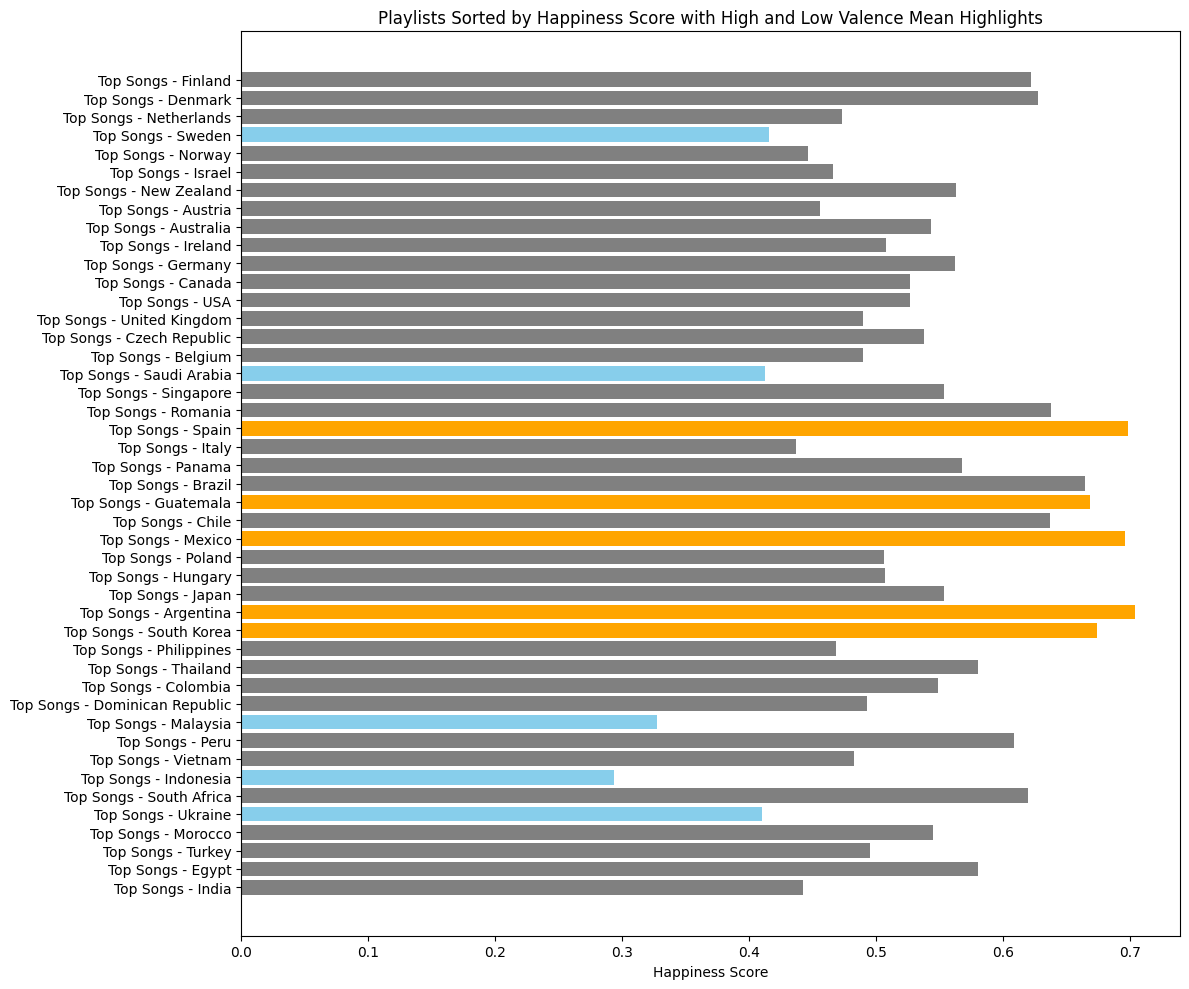

In [75]:
# valence scores sorted by Highest Happiness Score to Lowest
avg_val = top10_df.groupby('playlist')['valence'].mean().reset_index()
val_sorted = avg_val.merge(top10_df, on = 'playlist').sort_values(by = 'Happiness Score')

barcolors = []

for i in val_sorted['playlist']:
  if i in ['Top Songs - Argentina', 'Top Songs - Spain', 'Top Songs - Mexico', 'Top Songs - South Korea', 'Top Songs - Guatemala']:
    barcolors.append('orange')
  elif i in ['Top Songs - Sweden', 'Top Songs - Saudi Arabia', 'Top Songs - Ukraine', 'Top Songs - Malaysia', 'Top Songs - Indonesia']:
    barcolors.append('skyblue')
  else:
    barcolors.append('gray')

plt.figure(figsize=(12,10))
plt.barh(val_sorted['playlist'], val_sorted['valence_x'], color = barcolors)

plt.title('Playlists Sorted by Happiness Score with High and Low Valence Mean Highlights')
plt.xlabel('Happiness Score')
plt.tight_layout()

There seems to be not much correlation between happiness score of country and valence score of country's popular songs. These scatter plots below also show *no strong positive correlation* between Happiness Score or Depression Prevalence and Valence.

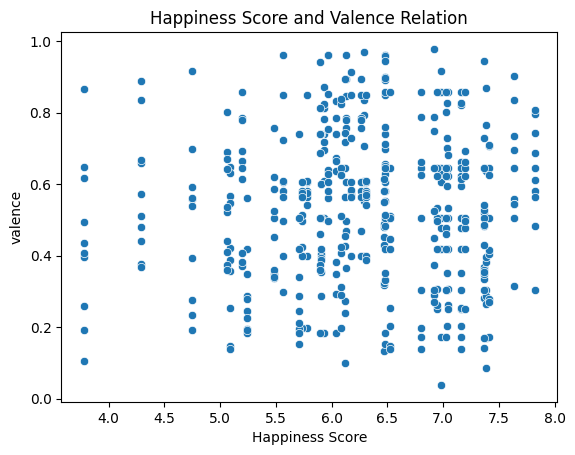

In [79]:
sns.scatterplot(data = top10_df, x = 'Happiness Score', y = 'valence')
plt.title('Happiness Score and Valence Relation')
plt.show()

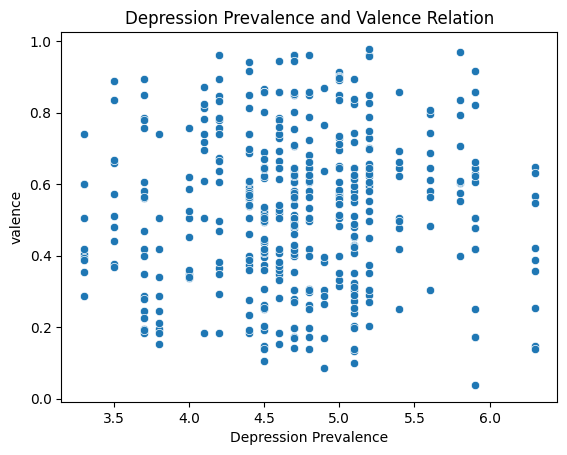

In [80]:
sns.scatterplot(data = top10_df, x = 'Depression Prevalence', y = 'valence' )
plt.title('Depression Prevalence and Valence Relation')
plt.show()

*** 

# Results

### Data Exploration - Exploring audio feature trends by country's happiness/depression score

Is there a relationship between a country's happiness score or a country's prevalence of depression and the popular songs respective in each? 

To see whether there is a relationship between the two, I assessed audio features trends for:
> countries with **high** happiness scores, **low** happiness scores, **high** prevalence of depression, and **low** prevalence of depression. 

I first got audio features for each country with highest happiness score (**Finland**), lowest happiness score (**India**), 
highest prevalence of depression (**Ukraine**), and lowest prevalence of depression(**Philippines**) but since the data was too small, I was not able to see any significant difference.

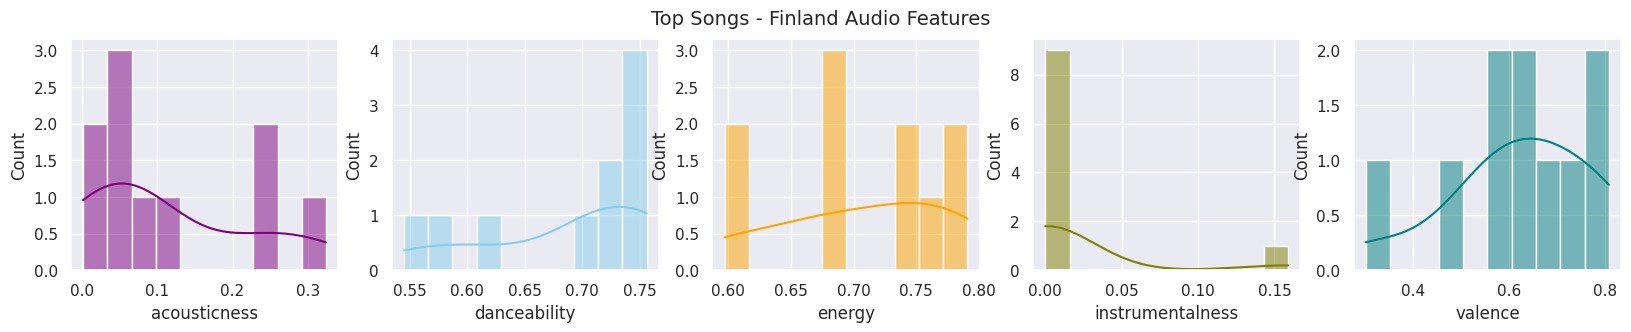

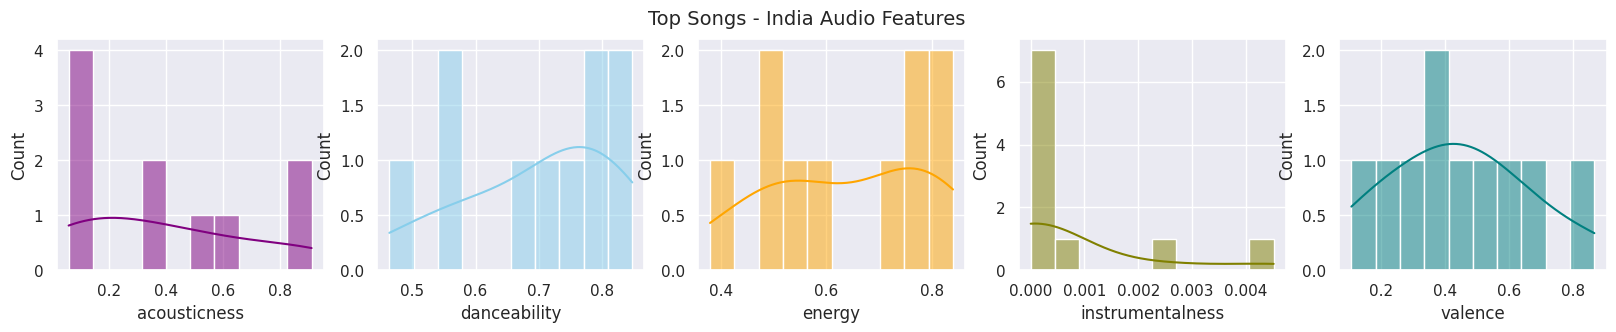

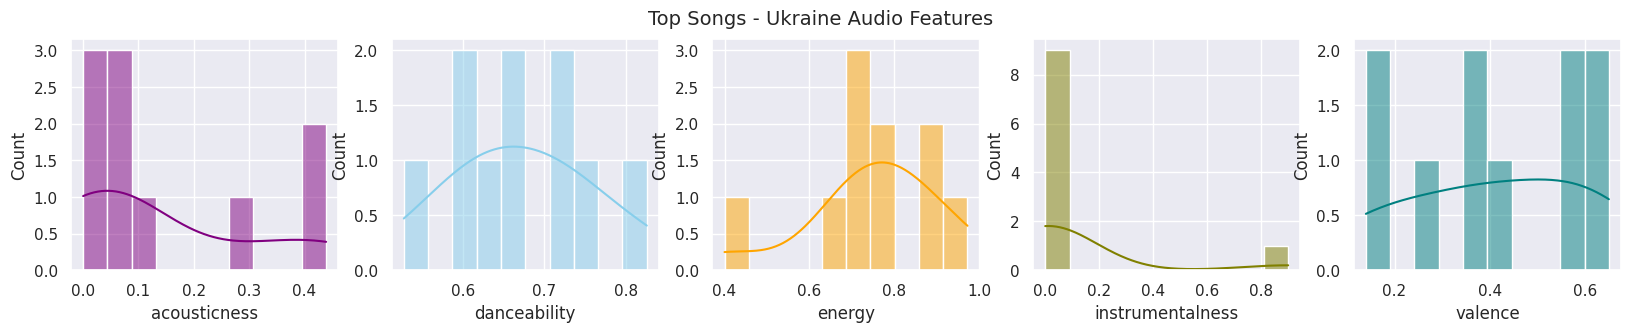

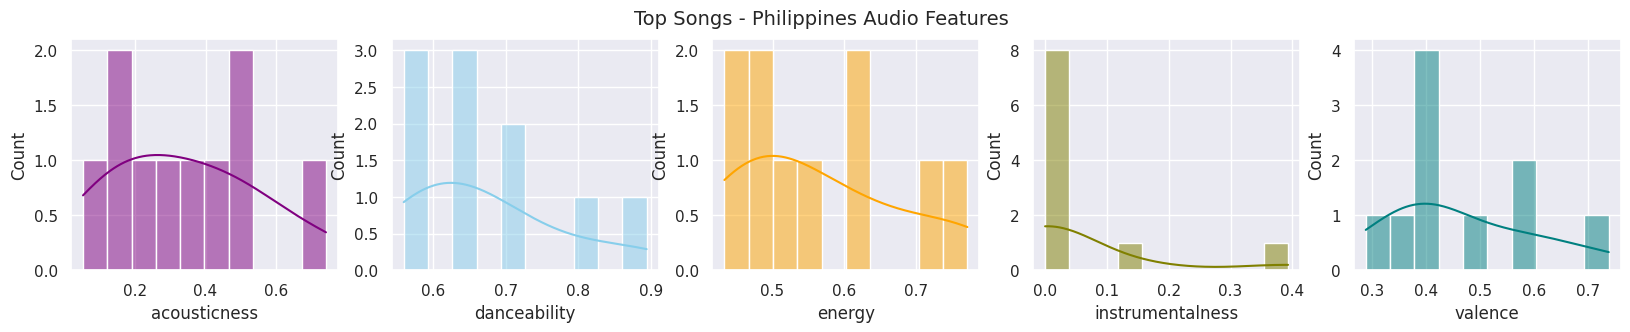

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'darkgrid')

'''
getting playlist data for country with highest happiness score, lowest happiness score, 
highest prevalence of depression, and lowest prevalence of depression
'''

highlow_data = ['Top Songs - Finland', 'Top Songs - India', 'Top Songs - Ukraine','Top Songs - Philippines']
af = ['acousticness','danceability','energy','instrumentalness','valence']

for p in highlow_data:
    pdf = top10_df.loc[top10_df['playlist'] == p, af]
    fig, ax = plt.subplots(1, 5, figsize = (20,3))
    
    # setting different colors for each audio feature
    for i, feature in enumerate(af):
        if feature == 'acousticness':
            sns.histplot(data = pdf, x = feature, kde = True, 
                         bins = 10, color = 'purple', ax = ax[i])
        elif feature == 'danceability':
            sns.histplot(data = pdf, x = feature, kde = True, 
                         bins = 10, color = 'skyblue', ax = ax[i])
        elif feature == 'energy':
            sns.histplot(data = pdf, x = feature, kde = True, 
                         bins = 10, color = 'orange', ax = ax[i])
        elif feature == 'instrumentalness':
            sns.histplot(data = pdf, x = feature, kde = True, 
                         bins = 10, color = 'olive', ax = ax[i])
        elif feature == 'valence':
            sns.histplot(data = pdf, x = feature, kde = True, 
                         bins = 10, color = 'teal', ax = ax[i])
    
    fig.suptitle(p + ' Audio Features', fontsize = 14)
    plt.show()

Most of the histograms were not normally distributed so there seems to be a lot of variability for the type of music people enjoy listening across the four countries.

**Acousticness** and **Instrumentalness**
 * These audio features are more right skewed for all, indicating that the popular tracks in each country are not very acoustic and contains more vocals rather than instrumentals. 

**Highest Happiness Score - Finland**
* **Danceability** is strongly left skewed, with a high peak on the right side. This suggests that Finland has a strong preference for songs that are very danceable.
* **Energy** has a a broad distrubtion with highest peak in the middle, but also smaller peaks on both low and high sides. This indicates preference for both low and high energy songs but slightly preferring song that are not too intense or quiet a bit more. 
* **Valence** is more left skewed, indicating a preference for songs that are more positive. This correspondingly reflects Finland's high happiness score.

**Lowest Happiness Score - India**
* **Danceability** is more left skewed for India as well, showing not much difference in danceability trends for highest and lowest happiness countries. However India has a high peak in the right side as well, showing preference for less danceable songs as well. 
* India has two peaks on both the lower and higher side for **energy**, indicating preferences for both low and high energy songs and again not much different with Finland. There seems to be separated groups that strongly prefer high energy songs and another preferring low energy songs or a mutual preference in songs that are highly intense as well as softer songs.
* **Valence** has a broad distribution, with a more normal but slighly right skewed histogram. As India scored lowest in happiness score, we can see a preference in less positive songs.

**Highest Depression Score - Ukraine**
* Ukraine's **danceability** is the most normally distributed, indicating a preference for songs that are not overly danceable or not danceable.
* Ukraine again has a peak in the middle for **energy**, indicating preference for songs that are not too intense or too soft. However there seems to be a very slight skew to the left.
* Similarly, Ukraine shows a lot of variability in **valence**, having high peaks in lower, middle, and higher valences. There seems to be a strong preference for very positive songs as well as not positive songs, and songs that are not overly positive or not positive.

**Lowest Depression Score - Philippines**
* **Danceability** is more right skewed for Philippines, indicating a preference for songs that are not very danceable. Although danceability is more right skewed for Finland, the country with highest happiness score, it is not the same for Philippines, which had lowest prevalence of depression.
* **Energy** is also more right skewed, with two high peaks on the right side but also another peak in the middle. There seems to be a preference for songs that are softer and quieter, as indicated by low danceability as well. 
* **Valence** is also right skewed, indicated by the high peak. It shows a preference for songs that are not very positive; however Philippines has the lowest depression prevalence. 

Although Finland's audio feature trends showed preferences for danceable and positive, high valence music, India which has the lowest happiness score also showed preference for danceable music so it is difficult to say if there is a relationship. Philippines, which had lowest prevalence of depression had opposite audio feature trends compared to Finland such as preference for less danceable and low valence music so relationship between valence and a country's happiness or depression score is hard to conclude.




## Audio Feature Trends for:
### 10 Highest & Lowest Happiness Countries and  10 Highest & Lowest Depression Countries

I felt the data for the histogram above was too small to depict an overall trend so I truncated the data to include:
>1. Top 10 happiness score countries' playlists audio features
>2. Low 10 happiness score countries' playlists audio features
>3. Top 10 depression prevalence countries' playlists audio features
>4. Low 10 depression prevalence countries' playlists audio features

By looking at combined audio feature trends for each group, I wanted to see whether there is a relationship or how much audio feature trends differ by comparing the different groups. 

1. **Top 10 happiness** score countries include: 

   Finland, Denmark, Netherlands, Sweden, Norway, Israel, New Zealand, Austria, Australia, and Ireland.


2. **Low 10 happiness** score countries include: 
   
   Malaysia, Peru, Vietnam, Indonesia, South Africa, Ukraine, Morocco, Turkey, Egypt, and India.


3. **Top 10 depression** prevalence countries include: 
   
   Ukraine, United States, Australia, Brazil, Finland, New Zealand, Germany, Spain, Czech Republic, and Hungary. 


4. **Low 10 depression** prevalence countries include: 
   
   Turkey, Mexico, Japan, South Korea, Vietnam, Malaysia, Guatemala, Indonesia, Egypt, and Philippines. 

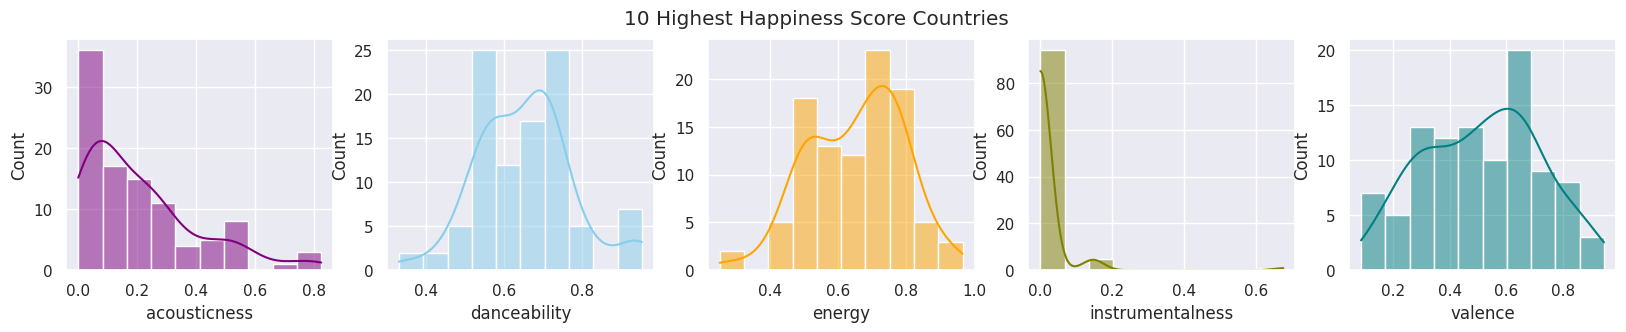

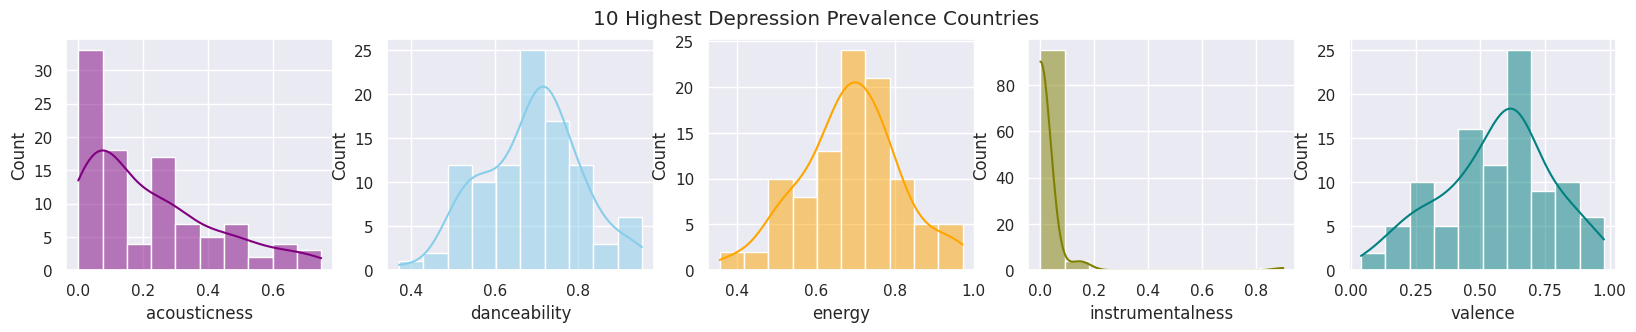

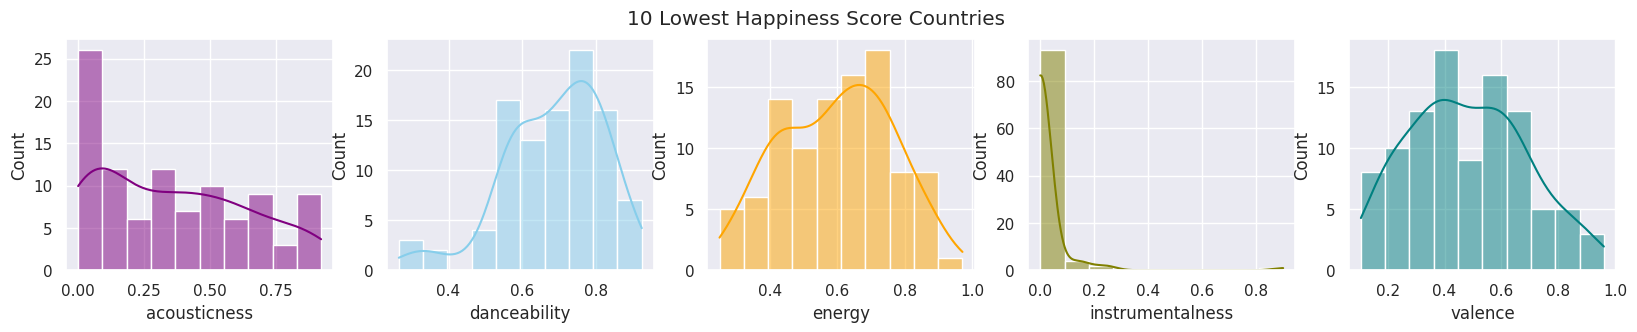

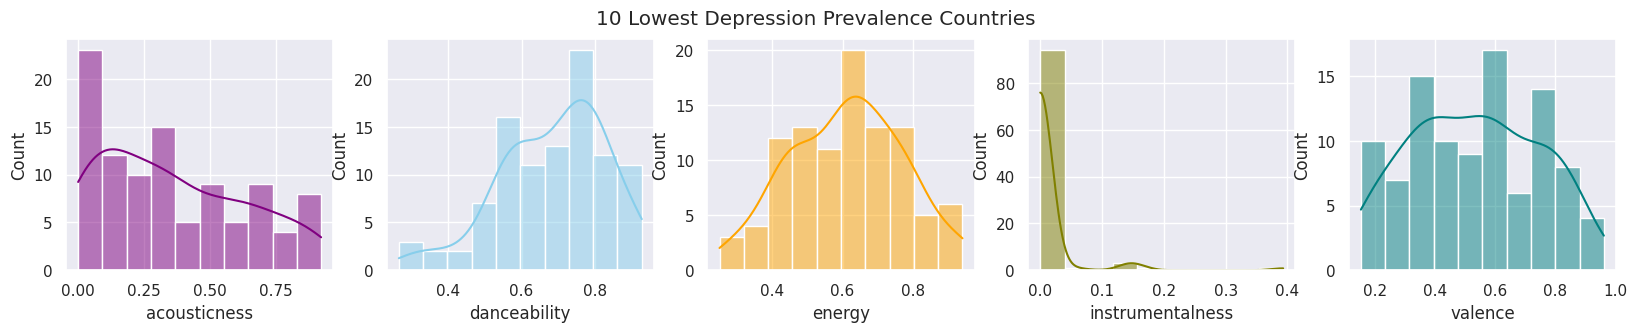

In [82]:
sns.set(style = 'darkgrid')

# getting top 10 highest and lowest happiness score countries playlist
trunc_wh = top10_df.sort_values(['Happiness Score','playlist'], ignore_index=True, ascending = False).groupby('playlist')[['playlist','acousticness','danceability','energy','instrumentalness','valence','Happiness Score','Depression Prevalence']].head(10)
hh = trunc_wh[:100]
lh = trunc_wh[-100:]

# getting top 10 highest and lowest depression prevalence countries playlist
trunc_wd = top10_df.sort_values(['Depression Prevalence', 'playlist'], ignore_index=True, ascending = False).groupby('playlist')[['playlist','acousticness','danceability','energy','instrumentalness','valence','Happiness Score','Depression Prevalence']].head(10)
hd = trunc_wd[:100]
ld = trunc_wd[-100:]

highlow_data = [hh, hd, lh, ld]

af = ['acousticness','danceability','energy','instrumentalness','valence']
subtitles = ['10 Highest Happiness Score Countries','10 Highest Depression Prevalence Countries', '10 Lowest Happiness Score Countries','10 Lowest Depression Prevalence Countries']

for s in range(len(highlow_data)):
    data = highlow_data[s]
    fig, ax = plt.subplots(1, 5, figsize = (20,3))
    
    for i, feature in enumerate(af):
        if feature == 'acousticness':
            sns.histplot(data = data, x = feature, kde = True, 
                         bins = 10, color = 'purple', ax = ax[i])
        elif feature == 'danceability':
            sns.histplot(data = data, x = feature, kde = True, 
                         bins = 10, color = 'skyblue', ax = ax[i])
        elif feature == 'energy':
            sns.histplot(data = data, x = feature, kde = True, 
                         bins = 10, color = 'orange', ax = ax[i])
        elif feature == 'instrumentalness':
            sns.histplot(data = data, x = feature, kde = True, 
                         bins = 10, color = 'olive', ax = ax[i])
        elif feature == 'valence':
            sns.histplot(data = data, x = feature, kde = True, 
                         bins = 10, color = 'teal', ax = ax[i])
    
    fig.suptitle(subtitles[s])
    plt.show()

Even after plotting histograms for the 10 highest and lowest happiness and depression scores, there were no distinct audio feature trend shown by a group. All groups showed preferences for less acousitc and instrumental tracks, and fairly normal distribution for energy and valence. However the 10 lowest happiness score countries and 10 lowest depression prevalence countries showed more preference for more danceable music while the 10 highest happiness score and 10 highest depression prevalence countries showed more preference towards not too danceable or not danceable songs. 

### Direct Comparisons of Histograms

To easily compare and distinguish any differences in audio feature trends, I directly compared audio feature trends for highest and lowest happiness score countries by creating a layered histogram. 
> The **gray** histogram represents **lowest** happiness score countries and the **pink** histogram represents the **highest** happiness score countries.

I created a layered histogram within the same dataset to avoid plotting audio features of the same countries. I created another layered histogram for the depression data set as well to compare audio feature trends for highest and lowest prevalence of depression countries.
> The **gray** histogram represents **lowest** prevalence countries and blue represent **highest** depression prevalence coutries.

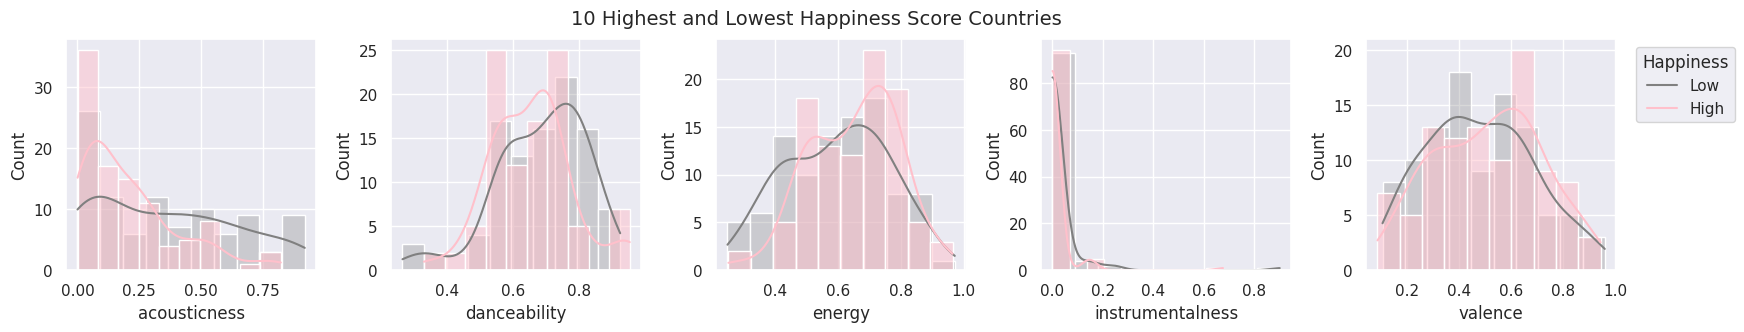

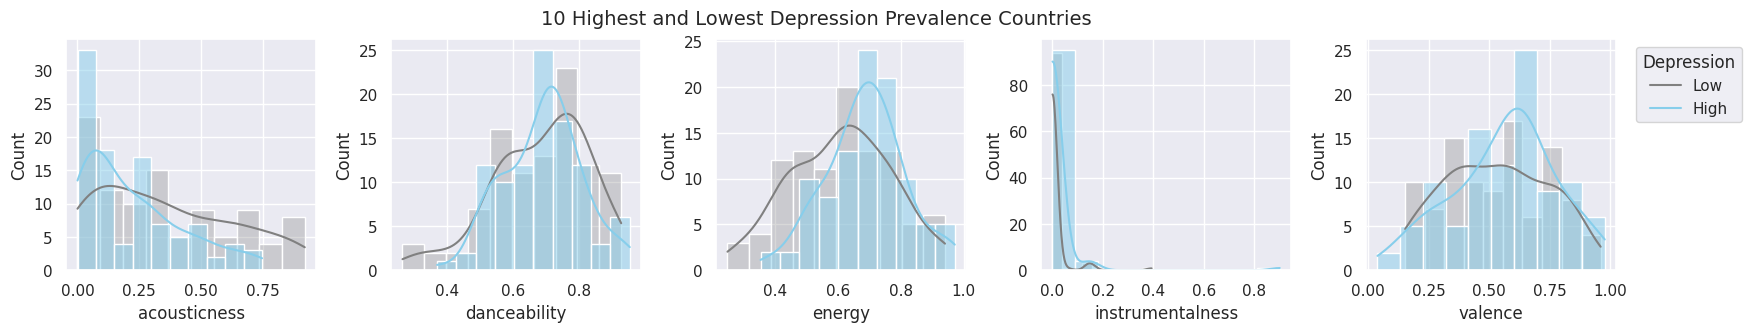

In [84]:
# plots for 10 highest and lowest happiness score countries
hap_hl = [lh, hh]
#for h in hap_hl:
fig, ax = plt.subplots(1, 5, figsize = (20,3))

for z in range(len(hap_hl)):
    if z == 0:
        for i, feature in enumerate(af):
            sns.histplot(data=hap_hl[z], x= feature, kde = True, 
                             color = 'gray',alpha=0.3, bins=10, multiple='layer',ax=ax[i])
    elif z == 1:
        for i, feature in enumerate(af):
                sns.histplot(data=hap_hl[z], x= feature, kde = True, 
                             color = 'pink', alpha = 0.5, bins=10, multiple='layer',ax=ax[i])

fig.suptitle('10 Highest and Lowest Happiness Score Countries', fontsize = 14)

plt.legend(title = 'Happiness', bbox_to_anchor=(1.05, 1), loc = 'upper left', labels=['Low', 'High'])
plt.subplots_adjust(wspace = 0.3)
plt.show()

# plots for 10 highest and lowest depression prevalence countries
dep_hl = [ld, hd]

fig, ax = plt.subplots(1, 5, figsize = (20,3))
for z in range(len(dep_hl)):
    if z == 0:
        for i, feature in enumerate(af):
            sns.histplot(data=dep_hl[z], x= feature, kde = True, 
                             color = 'gray',alpha=0.3, bins=10, multiple='layer',ax=ax[i])
    elif z == 1:
        for i, feature in enumerate(af):
                sns.histplot(data=dep_hl[z], x= feature, kde = True, 
                             color = 'skyblue', alpha = 0.5, bins=10, multiple='layer',ax=ax[i])

fig.suptitle('10 Highest and Lowest Depression Prevalence Countries', fontsize = 14)
plt.legend(title = 'Depression', bbox_to_anchor=(1.05, 1), loc = 'upper left', labels=['Low', 'High'])
plt.subplots_adjust(wspace = 0.3)
plt.show()

##### Highest vs. Lowest Happiness Score Countries

**Acousticness**
> Happiness Data
>   * Higher happiness score countries seem to lack acoustic hits in their playlists as indicated by the sharp peak skewed right, whereas the lower happiness score countries have a more spread out, broad distribution that is however still slightly skewed to the right.
>
> Depression Data
>  * The depression data also shows a general lack of acoustic hits with higher depression prevalence countries having a sharper peak than lower depression countries. The distribution for lower depression countries is broader compared to higher depression countries but both are skewed to the right.

**Danceability**
> Happiness Data
> * Danceability seems to be slighly more left skewed for lower happiness score countries than higher happiness score countries. Higher happiness countries' danceability seems to be more normally distributed, indicating a preferences for not overly danceable or not danceable songs. 
>
> Depression Data
>  * Countries with higher and lower prevalence of depression seems to have a similar distribution for danceability. However lower depression countries trend is slightly more skew to the left, indicating preference for more danceable music. Higher depression prevalence countries is more normally distributed than lower depression countries, but is still skewed to the left.

**Energy**
> Happiness Data
> * The trend for energy also seems to be similar, as both are fairly normally distributed. However the mean energy for higher happiness countries seem to be higher than for lower happiness countries. This is interesting as lower happiness score countries had a slightly more left skew for danceability. 
>
> Depression Data
>  * Lower depression prevalence countries is more normally distributed than higher depression prevalence countries, indicating a preference for not too intense or quiet music. Countries with higher prevalence of depression is more left skewed, indicating stronger preference for intense, energetic music. 

**Instrumentalness** 
>Happiness Data
> * Instrumentalness seems to be similar for both, with the same skew to the right. This again indicates that most popular songs across the world, regardless of happiness score have a preference for songs with more vocals rather than pure instrumentals. 
>
> Depression Data
>  * Instrumentalness seems to be similar for both in this dataset as well, with the same skew to the right. Higher depression countries is slightly more shifted to the right but both are very left skewed, indicating preference for song with more vocals regardless of depression prevalence. 

**Valence**
> Happiness Data
> * Although both seems to be fairly normally distributed, lower happiness score countries has a more right skew and lower mean for valence than higher happiness score countries. The high happiness countries has a more normally distributed valence trend with a very slight left skew with the higher mean value. 
> 
> Depression Data
> * Both are fairly normally distributed here as well, but countries with higher depression prevalence seems to be more left skewed with a higher mean, showing a stronger preference for higher valence songs. Low depression prevalence countries is normally distributed, indicating preference for not overly happy or overly sad songs.  


***

# Results 

To summarize my findings, I will refer to this heat map that we can better understand now after my analysis of the datasets. 

### Heat Map - Correlation Between Audio Features and Happiness/Depression Scores
The heat map helps put into context and visualize the correlation between audio features, happiness scores, and depression prevelance. As I have assessed the audio feature trends for the top highest and lowest happiness scores along with the top highest and lowest depression prevalence countries, there were more similarities than differences. Audio feature trends did not differ much between countries with high happiness scores or high depression prevalences.

/tmp/ipykernel_184/1871650708.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



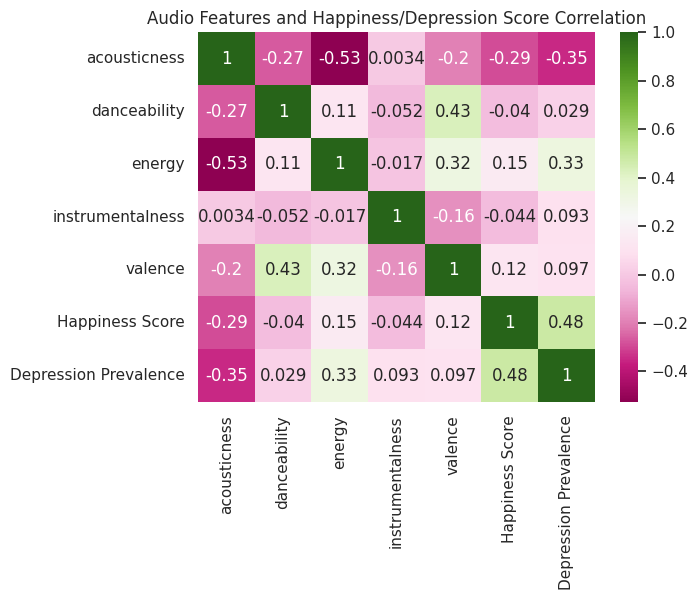

In [89]:
hl_concat = pd.concat([hh, hd, lh, ld], keys =['hh','lh','hd','ld'])
corr_matrix = hl_concat.corr()

sns.heatmap(corr_matrix, cmap = 'PiYG', annot = True)
plt.title('Audio Features and Happiness/Depression Score Correlation', fontsize = 12)
plt.show()

The heat map below show a strong correlation between:
* **Happiness score and depression prevalence** 
> This is interesting to note as I was able to see the slight positive correlation between the two when I plotted happiness and depression scores sorted by happiness scores from highest to lowest. Countries with high happiness scores tend to have higher depression prevalence as well, indicating that the depression dataset may lack some accuracy or inclusion in depression reports of those in lower happiness countries. It also shows that having high happiness score does not mean low prevalence of depression within the country. This suggests some questioning for the happiness dataset as well of how this is scored by who, and who is being silenced for what particular reason? 

* **Danceability and valence** 
> I saw that high valence scores did not correlate to high happiness scores as playlists with high valence scores were not countries that had the highest happiness scores. Popularity in high valence, more positive songs in the country does not mean that the country itself it more happy or that high happiness scoring countries strongly prefer high valence songs. Valence has a stronger correlation with danceability, suggesting more of a cultural reason to the trend of high valence and danceable songs that are popular in these countries.

* **Energy and depression prevalence** 
> As observed by the layered histograms, I was able to see that high depression prevalence countries followed audio feature trends of high happiness countries. This correlation suggests the point I made in the beginning, on who is able to report depression in these countries and be represented in the dataset. Some countries with high prevalence of depression were also countries scoring high in happiness as well, indicating that high happiness countries are able to provide more resources and have an organized health system structured for its citizens to access, therefore may have led to more reports of depression than those in low happiness scoring countries.

Not very strong correlation for: 
* **Happiness/depression score and valence**
> As noted above for correlation between danceability and valence and through Philippine's valence histogram, I was able to see that a country's happiness or depression score does not have a strong relationship with valence in the country's popular songs. Finland who had the highest happiness score did indicate a strong preference for very positive songs, but high depression countries also showed similar preferences and Philippines who has the lowest depression prevalence rather indicated a preference for less positive songs. 
* **Acousticness/Instrumentalness and Happiness/Depression Scores**
> The negative and very low correlations indicated by these features again shows us that all countries, regardless of happiness or depression levels, prefer songs that are less acoustic and instrumental. This makes sense as tracks that gain high popularity are rarely pure instrumentals and usually have more vocals and beats rather than gentle, acoustic sounds. 

### Parallel Coordinates Chart: 
### All Countries, High & Low Happiness Score Countries, High & Low Depression Prevalence Countries

The parallel coordinates chart below for all countries, high and low happiness score countries, and high and low depression prevalence countries again show that there is not much difference in audio feature trends for countries depending on happiness/depression scores. There were no strong relationship between a country's happiness score or depression prevalence and the country's popular song playlists' audio features. 
* Both groups of countries that were high in happiness or low in happiness had similar audio feature trends
* Both groups of countries that were high in depression prevalence or low in depression prevalence had similar audio feature trends as well.


In [90]:
# all countries
fig = px.parallel_coordinates(top10_df, color = 'Happiness Score',
                             dimensions = ['acousticness', 'danceability', 'energy', 'instrumentalness','valence'],
                             labels = {'acousticness': 'Acousticness', 'danceability': 'Danceability', 'energy':'Energy',
                                      'instrumentalness': 'Instrumentalness', 'valence':
                                       'Valence', 'Depression Prevalence': 'Depression prevalence'},color_continuous_midpoint=6,
                             title = 'All Countries Playlist Audio Features by Happiness Score')

fig.show()

# high and low happiness scores in happiness data
happy_hl_concat = pd.concat([hh,lh], keys=['hh','lh'])


fig = px.parallel_coordinates(happy_hl_concat, color = 'Happiness Score',
                             dimensions = ['acousticness', 'danceability', 'energy', 'instrumentalness','valence'],
                             labels = {'acousticness': 'Acousticness', 'danceability': 'Danceability', 'energy':'Energy',
                                      'instrumentalness': 'Instrumentalness', 'valence':'Valence'},
                             color_continuous_midpoint=6,
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             title = 'Highest and Lowest Happiness Score Countries Playlist by Happiness Score')

fig.show()

# high and low depression prevalence in depression data
dephl_concat = pd.concat([hd,ld], keys=['hd','ld'])


fig = px.parallel_coordinates(dephl_concat, color = 'Depression Prevalence',
                             dimensions = ['acousticness', 'danceability', 'energy', 'instrumentalness','valence'],
                             labels = {'acousticness': 'Acousticness', 'danceability': 'Danceability', 'energy':'Energy',
                                      'instrumentalness': 'Instrumentalness', 'valence':'Valence'},
                             color_continuous_midpoint=6,
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             title = 'Highest and Lowest Depression Prevalence Countries Playlist by Depression Prevalence')

fig.show()

These findings are useful as we are able to see the cohesiveness of audio feature trends for popular songs all around the globe, **regardless of how happy a country is** or **how prevalent depression is** in the country. Music is enjoyed and appreciated by all people around and by looking at audio feature trends for different countries' playlists, I was able to see the **big picture** of how we all share similar preferences for music.

This may be the reason to why music is considered to be a universal language, as the emotions it provokes is strong enough to be influential toward a wide, global audience. However this may be due to the fact that I only looked at Spotify API data, which is not fully inclusive of all countries. People that have access to Spotify in the varying countries may not accurately represent the country and be skewed toward only a certain group of people that is able to stream music through Spotify. Audio feature preferences may be shared, but the emotions that are felt by different countries may be interpreted differently as well and leave differing impacts on people so it is difficult to conclude whether a country's happiness/depression score has an impact on popular songs. This gets me to wonder then what is considered good music, since all the countries seem to have similar preferences in audio features.


> Other than a very slightly stronger preference for more positive and energetic songs by high happiness countries and a very slightly stronger preference for danceability by lower happiness countries, audio feature trends were mostly similar all across. 
>> Although I was not able to find any distinct audio feature trends for the differing happiness/depression scored countries, a surpising trend that I saw through my analysis was how 
>> **high prevalence of depression** countries followed **high happiness** countries audio feature trends more than **low prevalence of depression** countries. 
>
>> This was something I did not expect to see as I assumed countries with **low prevalence of depression** will have similar audio feature trends to **high happiness** score countries, and countries with **high prevalence of depression** will have similar audio feature trends to **low happiness score countries**, not the other way around. 

As noted and seen by the data visualizations that indicated this trend, there seems to be some silencing of data or a power dynamic in the collection of these data that does not accurately represent the true happiness and depression scores. Political, social, or cultural factors may play a role in the reports of the data as the topic of mental health and its prevalence is susceptible to the sensitivity of approach taken by various cultures. 